In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import missingno as msno
import warnings
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import OneHotEncoder, LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report





# PROBLEM

 Explanation
It is important to know if a patient will be readmitted in some hospital. The reason is that you can change the treatment, in order to avoid a readmission.

In this database, you have 3 different outputs:

* No readmission;

* A readmission in less than 30 days (this situation is not good, because maybe your treatment was not appropriate); 

* A readmission in more than 30 days (this one is not so good as well the last one, however, the reason can be the state of the patient.

In this context, you can see different objective functions for the problem. You can try to figure out situations where the patient will not be readmitted, or if their are going to be readmitted in less than 30 days (because the problem can the the treatment), etc… Make your choice and let's help them creating new approaches for the problem.

* Dataset Link [Kaggle](https:www.kaggle.com/brandao/diabetes)

**Content**

1. Load And Check Dataset 
2. Variable Description And Analysis
3. Data Analysis
4. Missing Values Operations
5. Outlier Detection
6. Model Selection and Results


 



# **1. Load And Check Dataset**

> The following operations were carried out under this title

* Read The **Diabet Dataset**
* Read The **Top 5 Data** In The Dataset 
* Learned The **Column Names** Of The Dataset
* Learned The **Size(Rows, Columns)** Of The Dataset
* Learned The **Basic Numerical Analysis** Of The Dataset
* We Learned **How Many Samples** There Are In The Dataset (It is the number of participants for this data set.)
* We Learned **How Many Features** There Are In The Dataset




---



In [ ]:
diabet = pd.read_csv("/content/diabetic_data.csv")
d_dataset = diabet.copy()

In [ ]:
diabet.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
diabet_columns_name = diabet.columns
print(f'Dateset Columns(Features) Names\n\n{diabet_columns_name}')

Dateset Columns(Features) Names

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


In [ ]:
# Learned The Sizes(Rows, Columns) of The Dataset
diabet_size = diabet.shape
print(f'Diabetes Dataset Size: {diabet_size}')

Diabetes Dataset Size: (101766, 50)


In [ ]:
# Learned The Basic Numerical Analysis Of The Dataset
diabet_numerical_analysis= diabet.describe().T.style.highlight_max(color='yellow').highlight_min(color = 'lightblue')
diabet_numerical_analysis

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.000000,165201645.622978,102640295.983458,12522.000000,84961194.000000,152388987.000000,230270887.500000,443867222.000000
patient_nbr,101766.000000,54330400.694947,38696359.346534,135.000000,23413221.000000,45505143.000000,87545949.750000,189502619.000000
admission_type_id,101766.000000,2.024006,1.445403,1.000000,1.000000,1.000000,3.000000,8.000000
discharge_disposition_id,101766.000000,3.715642,5.280166,1.000000,1.000000,1.000000,4.000000,28.000000
admission_source_id,101766.000000,5.754437,4.064081,1.000000,1.000000,7.000000,7.000000,25.000000
time_in_hospital,101766.000000,4.395987,2.985108,1.000000,2.000000,4.000000,6.000000,14.000000
num_lab_procedures,101766.000000,43.095641,19.674362,1.000000,31.000000,44.000000,57.000000,132.000000
num_procedures,101766.000000,1.339730,1.705807,0.000000,0.000000,1.000000,2.000000,6.000000
num_medications,101766.000000,16.021844,8.127566,1.000000,10.000000,15.000000,20.000000,81.000000
number_outpatient,101766.000000,0.369357,1.267265,0.000000,0.000000,0.000000,0.000000,42.000000


In [ ]:
# We learned How Many Samples There Are In The Dataset
diabet_nb_patients = len(diabet)
print(f'Number of Patients: {diabet_nb_patients}')

Number of Patients: 101766


In [ ]:
#We learned How Many Features There Are In Dataset
diabet_nb_features = len(diabet.columns)
print(f'Number of Features: {diabet_nb_features}')

Number of Features: 50


#**2. Variable Description And Analysis**

> The following operations were carried out under this title

* Columns In The Dataset And Their **Meanings**
* Inspect The **Metadata**

### **2.1 Univariate Variable Analysis**

*Univariate analysis examines variables (attributes) one by one. Variables can be categorical or numerical. There are different statistical and visualization techniques for each type of variable. Numeric variables can be converted into their categorical equivalents through a process called binning or discretization. It is also possible to convert a categorical variable into its numerical equivalent with a process called codding.*

> The following operations were carried out under this title

---
* We Found Columns of **Categorical Data** and **Numerical Data**
* We Create **Categorical DataFrame** and **Numerical DataFrame**
* We Found **Categorical Data Type** and **Numerical Data Type**
* We Have Shown The Proportions of **Categorical** And **Numerical Columns** In The Chart (Pie Chart)
* Analysis of **Categorical Data** and **Numerical Data**

**Metadata Results**



**RangeIndex :** 101766  entries, 0 to 101765

**Columns :** 50 columns(features) 

**dtypes :** int64(13), object(37)

**Memory Usage :** 38.8+ MB

In [ ]:
# Inspect the metadata 
diabet_metadata = diabet.info()
diabet_metadata


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [ ]:
# We Found Columns Name of Categorical Data
diabet_numerical_columns = list(diabet._get_numeric_data().columns)
diabet_categorical_columns = [col for col in diabet.columns if col not in diabet_numerical_columns]

print(f'Numerical Columns Name:\n\n{diabet_numerical_columns}\n\nCategorical Columns Name:\n\n{diabet_categorical_columns}')

Numerical Columns Name:

['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

Categorical Columns Name:

['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


In [ ]:
# We created 2 data frames, categorical and numeric.
categoric_df = pd.DataFrame(diabet[diabet_categorical_columns],columns = diabet_categorical_columns)
categoric_df.head(5)

,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),?,?,Pediatrics-Endocrinology,250.83,?,?,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),?,?,?,276,250.01,255,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),?,?,?,648,250,V27,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),?,?,?,8,250.43,403,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),?,?,?,197,157,250,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
# We created 2 data frames, categorical and numeric.
numeric_df = pd.DataFrame(diabet[diabet_numerical_columns], columns=diabet_numerical_columns)
copy_numeric_df = numeric_df.copy()
numeric_df.head(5).style.highlight_max(color='yellow').highlight_min(color = 'lightblue')

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,2278392,8222157,6,25,1,1,41,0,1,0,0,0,1
1,149190,55629189,1,1,7,3,59,0,18,0,0,0,9
2,64410,86047875,1,1,7,2,11,5,13,2,0,1,6
3,500364,82442376,1,1,7,2,44,1,16,0,0,0,7
4,16680,42519267,1,1,7,1,51,0,8,0,0,0,5


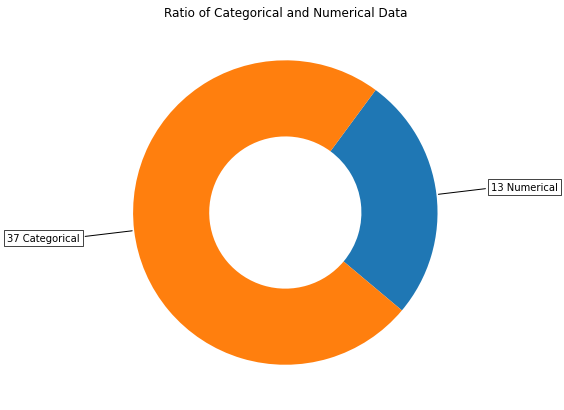

In [ ]:
# We Found How Many Categorical And Numerical Columns Are
nb_numerical_columns   = len(diabet_numerical_columns)
nb_categorical_columns = len(diabet_categorical_columns)

# Visualize
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(aspect="equal"))

recipe = [str(nb_numerical_columns)+' Numerical',
          str(nb_categorical_columns)+' Categorical']

data = [nb_numerical_columns, nb_categorical_columns]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Ratio of Categorical and Numerical Data")

plt.show()



# **3.Data Analysis**

#**Analysis Of Categorical And Numerical Data**
* Bar plot is applied for analysis of univariate categorical data.
* Histogram graph is applied to analyze the univariate numeric data.

#**Analysis Of Categorical Data** 
> Bar charts for categorical data are plotted below. 


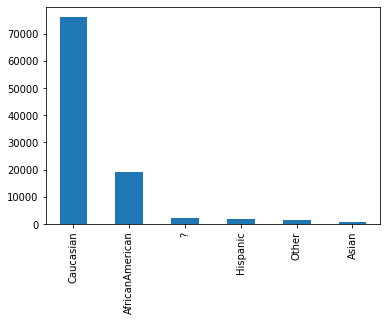

In [ ]:

d_dataset.race.value_counts().plot(kind = 'bar' )
plt.show()

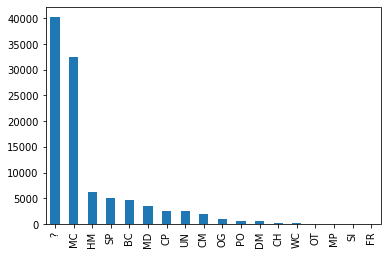

In [ ]:
#Integer identifier corresponding to 23 distinct values, for example, Blue Cross\Blue Shield, Medicare, and self-pay
d_dataset.payer_code.value_counts().plot(kind = 'bar' )
plt.show()

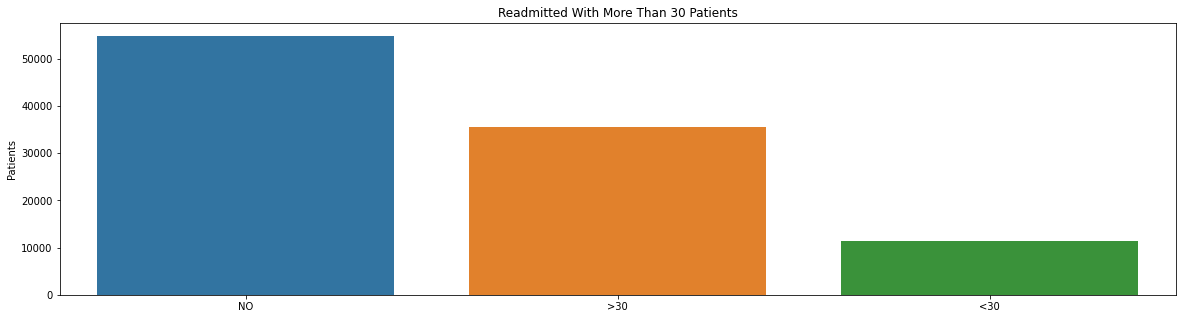

In [ ]:
#Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for norecord of readmission.
readmitted   = pd.DataFrame(categoric_df['readmitted'].value_counts())
readmitted_30 = readmitted[readmitted['readmitted'] >= 30]

# visualize
plt.figure(figsize=(20,5))
sns.barplot(data=readmitted_30, x=readmitted_30.index, y='readmitted')
plt.title('Readmitted With More Than 30 Patients')
plt.ylabel('Patients');

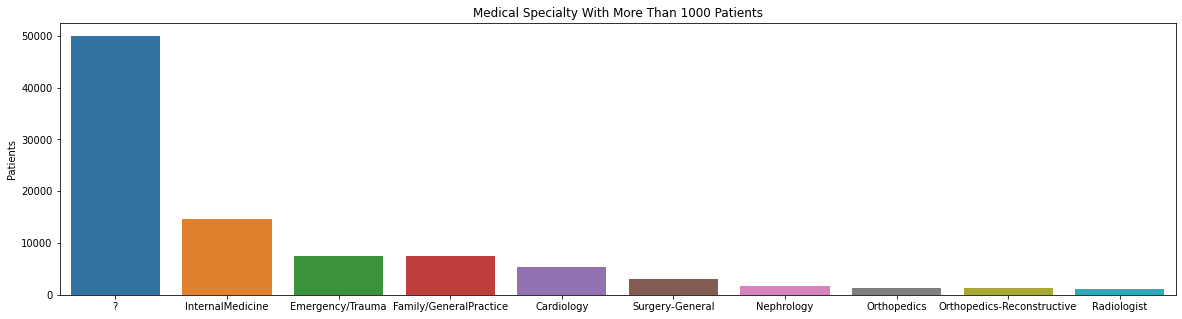

In [ ]:
#Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family\general practice, andsurgeon
medical_specialty = pd.DataFrame(categoric_df['medical_specialty'].value_counts())
medical_specialty_10 = medical_specialty[medical_specialty['medical_specialty'] >= 1000]

# visualize
plt.figure(figsize=(20,5))
sns.barplot(data=medical_specialty_10, x=medical_specialty_10.index, y='medical_specialty')
plt.title('Medical Specialty With More Than 1000 Patients')
plt.ylabel('Patients');

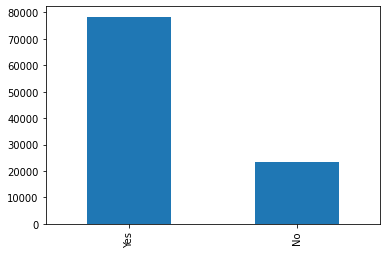

In [ ]:
#Indicates if there was any diabetic medication prescribed. 
d_dataset.diabetesMed.value_counts().plot(kind = 'bar' )
plt.show()

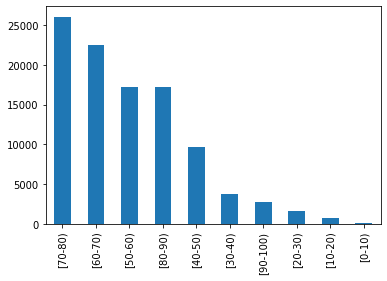

In [ ]:
# Grouped in 10-year intervals: [0, 10), [10, 20), ..., [90, 100)
d_dataset.age.value_counts().plot(kind = 'bar')
plt.show()

# **Analysis Of Numerical Data**


---


Histogram charts for numerical data are plotted below.

---
Numerical data are given below.
 *  Encounter Id
 *  Patient Nbr
 *  Admission Type Id
 *  Discharge Disposition Id
 *  Admission Source Id
 *  Time In Hospital 
 *  Num Lab Procedures
 *  Num Procedures
 *  Num Medications
 *  Number Outpatient
 *  Number Emergency
 *  Number Inpatient
 *  Number Diagnoses






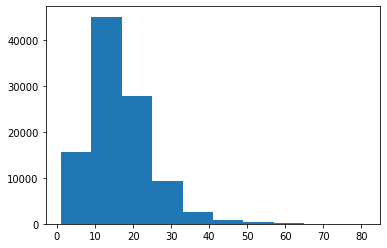

In [ ]:
#Number of distinct generic names administered during the encounter
x =d_dataset.num_medications
plt.hist(x, bins = 10)
plt.style.use('ggplot')
plt.show()


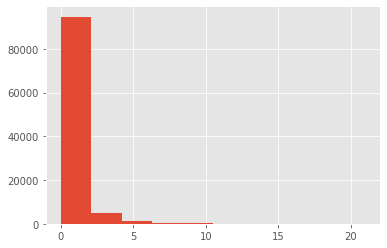

In [ ]:
#Number of inpatient visits of the patient in the year preceding the encounter
x = d_dataset.number_inpatient
plt.hist(x, bins =10)
plt.show()



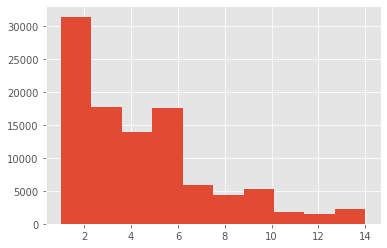

In [ ]:
#Integer number of days between admission and discharge
x = d_dataset.time_in_hospital
plt.hist(x, bins = 10)
plt.style.use('ggplot')
plt.show()


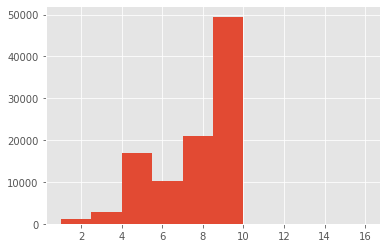

In [ ]:
#Number of diagnoses entered to the system
x = d_dataset.number_diagnoses
plt.hist(x, bins = 10)
plt.style.use('ggplot')
plt.show()


# **4. Missing Values Operations**

We performed the following actions regarding missing data in the data set 

* We found if there is missing data in the dataset. (There is missing data)
* How many missing data we found.
* We deleted this data because there was too much data in the dataset.
* We found how many data is left in the data set after the data was deleted.

In [ ]:
d_dataset.replace(to_replace=['?'], value=np.nan, inplace=True)


In [ ]:
 #check missing data in the dataset
print(f'Is there any missing value? {d_dataset.isnull().values.any()}')

# sum of missing data
print(f'How many missing values? {d_dataset.isnull().values.sum()}')

Is there any missing value? True
How many missing values? 192849


**4.1.1 Missing Matrix**

Below we see the matrix graph of the values ​​that are empty in the factors.


In [ ]:
# create a missing value matrix
factor_columns = d_dataset.loc[:,'encounter_id':'readmitted']
_=msno.matrix(factor_columns)

> There are predominantly missing data in features **weight**,  **payer_code**, 
**medical_specialty**. Incomplete data are observed in other properties.

In [ ]:
d_dataset['race']=d_dataset.race.replace('?',np.nan)

In [ ]:
d_dataset['race'].fillna(d_dataset['race'].mode()[0], inplace=True)

In [ ]:
d_dataset.race.isnull().sum()

0

# **Feature Normalization**

---
There are 50 features in the data set. Deletion or editing of features in the dataset is done below.

**3.1 Feature Drop**


---


Let's delete unnecessary features in the dataset.






In [ ]:
diabet= diabet.drop(['medical_specialty','payer_code','weight','encounter_id','patient_nbr'], axis=1)

**Feature Visiualization**

---
Unnecessary columns were deleted from the data set. The newly formed dataset is shown below.

* The highest value found in the dataset column is shown in yellow
* The lowest value found in the dataset column is shown in lightblue


In [ ]:
diabet.head(10).style.highlight_max(color='yellow').highlight_min(color = 'lightblue')

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,Caucasian,Male,[50-60),2,1,2,3,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
6,Caucasian,Male,[60-70),3,1,2,4,70,1,21,0,0,0,414,411,V45,7,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,Caucasian,Male,[70-80),1,1,7,5,73,0,12,0,0,0,428,492,250,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
8,Caucasian,Female,[80-90),2,1,4,13,68,2,28,0,0,0,398,427,38,8,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,Caucasian,Female,[90-100),3,3,4,12,33,3,18,0,0,0,434,198,486,8,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


# **5.Outlier Detection**
> Finding outliers in the data set. We will use the IQR method for this.

* Finding **1st quartile**
* Finding **3rd quartile**
* **IQR** method
* **Outlier Step**
* Detect **outlier** and **their indeces**
* Store **indeces**



In [ ]:
def detect_outliers(df,features):
  outlier_indeces = []

  for i in features:
    # 1st quartile %25
    Q1 = np.percentile (df[i],25)

    # 3rd quartile %75
    Q3 = np.percentile (df[i],75)

    # IQR
    IQR = Q3 - Q1

    # outlier step
    outlier_step = IQR *1.5

    # detect outlier and their indeces 
    outlier_list_col = df[(df[i] < Q1 - outlier_step) | (df[i] > Q3 + outlier_step)].index
    
    # store indeces
    outlier_indeces.extend(outlier_list_col)
  
  outlier_indeces = Counter(outlier_indeces)
  multiple_outliers = list(i for i, v in outlier_indeces.items() if v > 2)

  return multiple_outliers



In [ ]:
outliers_list = numeric_df.loc[detect_outliers(numeric_df,['encounter_id','patient_nbr','admission_type_id','discharge_disposition_id','admission_source_id','time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses'])]

outliers_value = outliers_list.shape[0]

if (outliers_value <= 0):
  print(f'Not found outliers value. ')
else:
  print(f'Outliers value:\n\n{outliers_list}')

Outliers value:

        encounter_id  patient_nbr  ...  number_inpatient  number_diagnoses
90842      301370354    187061540  ...                 0                 9
92822      327315608    186723347  ...                 0                 9
95339      360746432    183908894  ...                 0                 9
96863      381402800    189179321  ...                 0                 9
100090     421379366    189097331  ...                 0                 9
...              ...          ...  ...               ...               ...
101650     442515896     85901769  ...                 8                 6
101658     442552658     88227540  ...                10                 9
40584      125930982     89472402  ...                 6                 1
91298      307347644     35967501  ...                 3                 1
97244      386153312    106356708  ...                 4                16

[3248 rows x 13 columns]


# **6.Model Selection and Results**

In [ ]:
diabet_ml = pd.read_csv("/content/diabetic_data.csv")
diabet_ml.replace('?',np.nan,inplace=True)
diabet_ml.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
#dropping columns with high NA percentage
diabet_ml.drop(['weight','medical_specialty','payer_code'],axis=1,inplace=True)
# dropping columns related to IDs
diabet_ml.drop(['encounter_id','patient_nbr','admission_type_id',
         'discharge_disposition_id','admission_source_id'],axis=1,inplace=True)
#removing invalid/unknown entries for gender
diabet_ml=diabet_ml[diabet_ml['gender']!='Unknown/Invalid']
# dropping rows with NAs.
diabet_ml.dropna(inplace=True)

In [ ]:
diag_cols = ['diag_1','diag_2','diag_3']
for col in diag_cols:
    diabet_ml[col] = diabet_ml[col].astype(str).str.replace('E','-')
    diabet_ml[col] = diabet_ml[col].astype(str).str.replace('V','-')
    condition = diabet_ml[col].astype(str).str.contains('250')
    diabet_ml.loc[condition,col] = '250'

diabet_ml[diag_cols] = diabet_ml[diag_cols].astype(float)

# diagnosis grouping
for col in diag_cols:
    diabet_ml['temp']=np.nan
    
    condition = diabet_ml[col]==250
    diabet_ml.loc[condition,'temp']='Diabetes'
    
    condition = (diabet_ml[col]>=390) & (diabet_ml[col]<=458) | (diabet_ml[col]==785)
    diabet_ml.loc[condition,'temp']='Circulatory'
    
    condition = (diabet_ml[col]>=460) & (diabet_ml[col]<=519) | (diabet_ml[col]==786)
    diabet_ml.loc[condition,'temp']='Respiratory'
    
    condition = (diabet_ml[col]>=520) & (diabet_ml[col]<=579) | (diabet_ml[col]==787)
    diabet_ml.loc[condition,'temp']='Digestive'
    
    condition = (diabet_ml[col]>=580) & (diabet_ml[col]<=629) | (diabet_ml[col]==788)
    diabet_ml.loc[condition,'temp']='Genitourinary'
    
    condition = (diabet_ml[col]>=800) & (diabet_ml[col]<=999)
    diabet_ml.loc[condition,'temp']='Injury'
    
    condition = (diabet_ml[col]>=710) & (diabet_ml[col]<=739)
    diabet_ml.loc[condition,'temp']='Muscoloskeletal'
    
    condition = (diabet_ml[col]>=140) & (diabet_ml[col]<=239)
    diabet_ml.loc[condition,'temp']='Neoplasms'
    
    condition = diabet_ml[col]==0
    diabet_ml.loc[condition,col]='?'
    diabet_ml['temp']=diabet_ml['temp'].fillna('Others')
    condition = diabet_ml['temp']=='0'
    diabet_ml.loc[condition,'temp']=np.nan
    diabet_ml[col]=diabet_ml['temp']
    diabet_ml.drop('temp',axis=1,inplace=True)

diabet_ml.dropna(inplace=True)

diabet_ml['age'] = diabet_ml['age'].str[1:].str.split('-',expand=True)[0]
diabet_ml['age'] = diabet_ml['age'].astype(int)
max_glu_serum_dict = {'None':0,
                      'Norm':100,
                      '>200':200,
                      '>300':300
                     }
diabet_ml['max_glu_serum'] = diabet_ml['max_glu_serum'].replace(max_glu_serum_dict)

A1Cresult_dict = {'None':0,
                  'Norm':5,
                  '>7':7,
                  '>8':8
                 }
diabet_ml['A1Cresult'] = diabet_ml['A1Cresult'].replace(A1Cresult_dict)

change_dict = {'No':-1,
               'Ch':1
              }
diabet_ml['change'] = diabet_ml['change'].replace(change_dict)

diabetesMed_dict = {'No':-1,
                    'Yes':1
                   }
diabet_ml['diabetesMed'] = diabet_ml['diabetesMed'].replace(diabetesMed_dict)

d24_feature_dict = {'Up':10,
                    'Down':-10,
                    'Steady':0,
                    'No':-20
                   }
d24_cols = ['metformin','repaglinide','nateglinide','chlorpropamide',
 'glimepiride','acetohexamide','glipizide','glyburide',
 'tolbutamide','pioglitazone','rosiglitazone','acarbose',
 'miglitol','troglitazone','tolazamide','examide',
 'citoglipton','insulin','glyburide-metformin','glipizide-metformin',
 'glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone']
for col in d24_cols:
    diabet_ml[col] = diabet_ml[col].replace(d24_feature_dict)

condition = diabet_ml['readmitted']!='NO'
diabet_ml['readmitted'] = np.where(condition,1,0)

diabet_ml.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,Caucasian,Female,10,3,59,0,18,0,0,0,Others,Diabetes,Others,9,0,0,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,10,-20,-20,-20,-20,-20,1,1,1
2,AfricanAmerican,Female,20,2,11,5,13,2,0,1,Others,Diabetes,Others,6,0,0,-20,-20,-20,-20,-20,-20,0,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-1,1,0
3,Caucasian,Male,30,2,44,1,16,0,0,0,Others,Diabetes,Circulatory,7,0,0,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,10,-20,-20,-20,-20,-20,1,1,0
4,Caucasian,Male,40,1,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes,5,0,0,-20,-20,-20,-20,-20,-20,0,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,0,-20,-20,-20,-20,-20,1,1,0
5,Caucasian,Male,50,3,31,6,16,0,0,0,Circulatory,Circulatory,Diabetes,9,0,0,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,0,-20,-20,-20,-20,-20,-1,1,1


In [ ]:
cat_cols = list(diabet_ml.select_dtypes('object').columns)
class_dict = {}
for col in cat_cols:
    diabet_ml = pd.concat([diabet_ml.drop(col, axis=1), pd.get_dummies(diabet_ml[col])], axis=1)
diabet_ml.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,AfricanAmerican,Asian,Caucasian,Hispanic,Other,Female,Male,Circulatory,Diabetes,Digestive,Genitourinary,Injury,Muscoloskeletal,Neoplasms,Others,Respiratory,Circulatory,Diabetes,Digestive,Genitourinary,Injury,Muscoloskeletal,Neoplasms,Others,Respiratory,Circulatory,Diabetes,Digestive,Genitourinary,Injury,Muscoloskeletal,Neoplasms,Others,Respiratory
1,10,3,59,0,18,0,0,0,9,0,0,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,10,-20,-20,-20,-20,-20,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,20,2,11,5,13,2,0,1,6,0,0,-20,-20,-20,-20,-20,-20,0,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,30,2,44,1,16,0,0,0,7,0,0,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,10,-20,-20,-20,-20,-20,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,40,1,51,0,8,0,0,0,5,0,0,-20,-20,-20,-20,-20,-20,0,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,0,-20,-20,-20,-20,-20,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
5,50,3,31,6,16,0,0,0,9,0,0,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,0,-20,-20,-20,-20,-20,-1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
Xs = diabet_ml.drop('readmitted',axis=1)
y = diabet_ml['readmitted']
X_train,X_test,y_train,y_test = train_test_split(Xs,y,test_size=0.20,random_state=0)
X_train.shape,X_test.shape

((78441, 70), (19611, 70))

**KNN Algorithm**

In [ ]:
class_knn =  KNeighborsClassifier(n_neighbors = 3)

class_knn.fit(X_train,y_train)
class_knn.score(X_test,y_test)

0.5433685176686553

In [ ]:
for i in range(3,20):
  class_knn =  KNeighborsClassifier(n_neighbors = i)
  class_knn.fit(X_train,y_train)
  print(f"k= {i}. {class_knn.score(X_test,y_test)}")

k= 3. 0.5433685176686553
k= 4. 0.5501504257814492
k= 5. 0.5421447147009332
k= 6. 0.544898271378308
k= 7. 0.5468359594105349
k= 8. 0.5525470399265718
k= 9. 0.54785579521697
k= 10. 0.5532099332007547
k= 11. 0.5467339758298914
k= 12. 0.5534648921523635
k= 13. 0.553974810055581
k= 14. 0.5542807607975117
k= 15. 0.5515781959104584
k= 16. 0.5541277854265463
k= 17. 0.5529549742491459
k= 18. 0.5553515883942686
k= 19. 0.5577991943297129


**Naive Bayes Algorithm**

In [ ]:
from sklearn.naive_bayes import GaussianNB
class_nb = GaussianNB()
class_nb.fit(X_train , y_train)
y_pred = class_nb.predict(X_test)

In [ ]:
class_nb.score(X_test,y_test)

0.5931365050226913

**Decision Tree Algorithm**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
class_tree = DecisionTreeClassifier(criterion="entropy" ,max_depth = 3)
class_tree.fit(X_train,y_train)
y_pred =class_tree.predict(X_test) 

In [ ]:
class_tree.score(X_test,y_test)

0.6133802457804294

**Neural Network Algorithm**

In [ ]:
from sklearn.neural_network import MLPClassifier

class_mlc = MLPClassifier(activation='relu',solver= 'adam')

class_mlc.fit(X_train, y_train)

y_pred = class_mlc.predict(X_test)

In [ ]:
class_mlc.score(X_test, y_test)

0.6245474478608944

**Result**

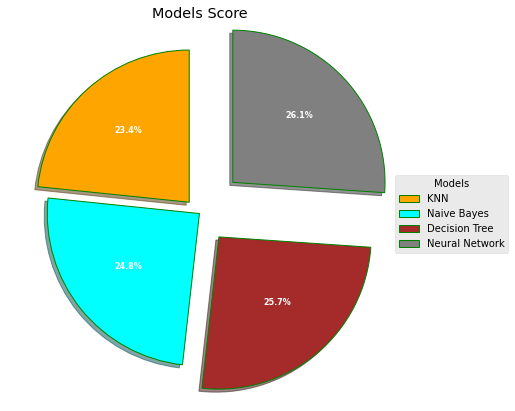

In [ ]:
from matplotlib import pyplot as plt 
import numpy as np 
  
  
# Creating dataset 
models = ['KNN', 'Naive Bayes', 'Decision Tree','Neural Network'] 
  
models_score = [0.5577991943297129, 0.5931365050226913 , 0.6133802457804294, 0.6225587680383459] 

explode = (0.1, 0.0, 0.2, 0.3) 
  
# Creating color parameters 
colors = ( "orange", "cyan", "brown", 
          "grey", "indigo", "beige") 
  
# Wedge properties 
wp = { 'linewidth' : 1, 'edgecolor' : "green" } 
  
# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n".format(pct, absolute) 
  
# Creating plot 
fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotexts = ax.pie(models_score,  
                                  autopct = lambda pct: func(pct, models_score), 
                                  explode = explode,  
                                  labels = models, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="white")) 
  
# Adding legend 
ax.legend(wedges, models, 
          title ="Models", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 
  
plt.setp(autotexts, size = 8, weight ="bold") 
ax.set_title("Models Score") 
  
# show plot 
plt.show() 




---


> When we look at the model success rates, the best result is the model established with an artificial neural network.

---



